In [1]:
#data set

#A
a=[0, 0, 1, 1, 0, 0, 
   0, 1, 0, 0, 1, 0, 
   1, 1, 1, 1, 1, 1, 
   1, 0, 0, 0, 0, 1, 
   1, 0, 0, 0, 0, 1]

#8
b =[0, 1, 1, 1, 1, 0, 
    0, 1, 0, 0, 1, 0, 
    0, 1, 1, 1, 1, 0, 
    0, 1, 0, 0, 1, 0, 
    0, 1, 1, 1, 1, 0]

#C
c =[0, 1, 1, 1, 1, 0, 
    0, 1, 0, 0, 0, 0, 
    0, 1, 0, 0, 0, 0, 
    0, 1, 0, 0, 0, 0, 
    0, 1, 1, 1, 1, 0]

In [2]:
#creating labels
y=[[1,0,0],
  [0,1,0],
  [0,0,1]]
     

In [3]:
import numpy as np
import matplotlib.pyplot as plt

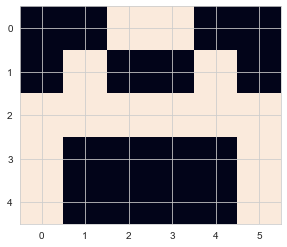

In [4]:
# visualize the data
plt.imshow(np.array(a).reshape(5,6))
plt.show()

In [5]:
#convert data and  labels into numpy array
x=[np.array(a).reshape(1,30),
   np.array(b).reshape(1,30),
   np.array(c).reshape(1,30)]

y=np.array(y)
print(x,"\n\n",y)

[array([[0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
        0, 1, 1, 0, 0, 0, 0, 1]]), array([[0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0,
        1, 0, 0, 1, 1, 1, 1, 0]]), array([[0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
        0, 0, 0, 1, 1, 1, 1, 0]])] 

 [[1 0 0]
 [0 1 0]
 [0 0 1]]


In [6]:
#input(1,30)
#hidden(1,5)
#output(3,3)

In [7]:
#activation function

def sigmoid(x):
    return 1/(1 + np.exp(-x))

In [8]:
#creating feed forward NN
def f_forward(x,w1,w2):

    #hidden layer
    z1=x.dot(w1)
    a1=sigmoid(z1)

    #output layer
    z2=a1.dot(w2)
    a2=sigmoid(z2)
    return(a2)

In [9]:
#initilaize the weight

def generate_wt(x, y):
    l = []
    for i in range(x * y):
        l.append(np.random.randn())
    return np.array(l).reshape(x, y)


In [10]:
def loss(out,y):
    s=(np.square(out-y))
    s=np.sum(s)/len(y)
    return s

In [11]:
#back propagation
def back_prop(x,y,w1,w2,alpha):

    #hidden layer
    z1=x.dot(w1)
    a1=sigmoid(z1)

    #output layer
    z2=a1.dot(w2)
    a2=sigmoid(z2)

    d2=(a2-y)
    d1=d1=np.multiply(d2.dot(w2.T), np.multiply(a1, 1-a1))

    #gradient`
    w1_adj=x.transpose().dot(d1)
    w2_adj=a1.transpose().dot(d2)

    w1=w1-(alpha * w1_adj)
    w2=w2-(alpha * w2_adj)

    return w1,w2

In [12]:
def train(x, y, w1, w2, alpha=0.01, epoch=10):
    acc = []
    loss_list = []

    for j in range(epoch):
        l = []
        for i in range(len(x)):
            out = f_forward(x[i], w1, w2) 
            l.append((loss(out, y[i])))
            w1, w2 = back_prop(x[i], y[i], w1, w2, alpha)
        print("Epoch:", j+1, "acc:", (1 - (sum(l) / len(x))) * 100)
        acc.append((1 - (sum(l) /len(x)))*100)
        loss_list.append(sum(l) / len(x))
    return acc, loss_list, w1, w2


In [13]:
def predict(x,w1,w2):
    out = f_forward(x,w1,w2)
    maxm=0
    k=0
    for i in range(len(out[0])):
        if maxm<out[0][i]:
            maxm=out[0][i]
        k=i
        if(k==0):
            print("image is of letter A")
        elif(k==1):
            print("image is of letter B")
        else:
            print("image is of letter C")
            plt.imshow(x.reshape(5,6))
        plt.show()




In [14]:
w1=generate_wt(30,5)
w2=generate_wt(5,3)
print(w1,"\n",w2)

[[ 4.94469497e-02  2.68916358e-01  6.60127708e-01  1.23929308e+00
  -3.95428259e-01]
 [-7.16087195e-01 -3.42057054e-01  9.66823754e-01 -1.44736697e-01
  -2.98208994e-01]
 [ 1.54768792e+00  8.17391670e-02  1.29912592e+00 -7.80188035e-01
   2.87387394e-01]
 [ 2.69848091e-01 -1.54191406e+00  8.36383851e-01 -7.79346131e-01
   1.78659715e-01]
 [ 2.59343834e-01 -4.00553866e-01 -4.34946011e-01 -9.83872608e-01
  -9.91280438e-01]
 [ 6.64404593e-01 -8.64540776e-01 -4.18352994e-01  1.53590333e+00
   1.27479645e+00]
 [ 2.77118382e-01  7.79792435e-01  1.34360599e+00 -8.82254160e-01
   5.79558187e-01]
 [ 1.74736709e+00 -1.09321809e+00 -1.51601948e-01 -1.77097745e-01
   1.18355708e+00]
 [ 8.97846521e-01  1.41093063e+00  4.67101961e-01 -1.20821550e-01
   3.90568361e-01]
 [ 3.63404790e-01 -5.55742586e-01 -1.59969029e+00  1.32362868e+00
  -1.07324957e-01]
 [-1.45544921e+00  4.82963946e-01  1.51511778e+00 -1.27197957e+00
   6.09306829e-01]
 [-1.09411060e+00 -2.73446773e-01  3.61165124e-01  3.74030539e-01

In [15]:
acc, loss, w1, w2 = train(x, y, w1, w2, 0.1, 100)

Epoch: 1 acc: 60.5874839794567
Epoch: 2 acc: 63.008961888303006
Epoch: 3 acc: 65.87082333209659
Epoch: 4 acc: 68.21358594728042
Epoch: 5 acc: 70.09620993275479
Epoch: 6 acc: 71.67452442413779
Epoch: 7 acc: 72.98968422877157
Epoch: 8 acc: 74.07196981352394
Epoch: 9 acc: 74.96186914490207
Epoch: 10 acc: 75.70296823712519
Epoch: 11 acc: 76.33533629533379
Epoch: 12 acc: 76.89286444465613
Epoch: 13 acc: 77.40279582615763
Epoch: 14 acc: 77.88608303729906
Epoch: 15 acc: 78.35786716790523
Epoch: 16 acc: 78.82778356521291
Epoch: 17 acc: 79.30013634450508
Epoch: 18 acc: 79.77430298890012
Epoch: 19 acc: 80.2458761738476
Epoch: 20 acc: 80.70872240867753
Epoch: 21 acc: 81.15735416586705
Epoch: 22 acc: 81.58852068713838
Epoch: 23 acc: 82.00143071494789
Epoch: 24 acc: 82.39700652850208
Epoch: 25 acc: 82.77696040212876
Epoch: 26 acc: 83.14316437969667
Epoch: 27 acc: 83.4973649700205
Epoch: 28 acc: 83.84111800785456
Epoch: 29 acc: 84.17582284003196
Epoch: 30 acc: 84.50278513047238
Epoch: 31 acc: 84.823

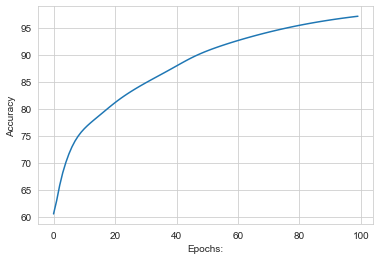

In [16]:
import matplotlib.pyplot as plt

# plotting accuracy
plt.plot(acc)
plt.ylabel("Accuracy")  # Corrected typo here
plt.xlabel("Epochs:")   # Corrected typo here
plt.show()


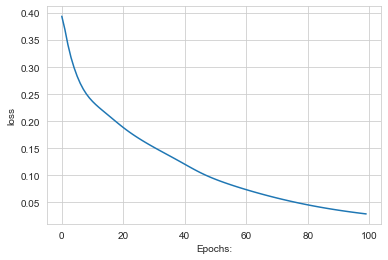

In [17]:

#plotting accuracy

plt.plot(loss)
plt.ylabel("loss")
plt.xlabel("Epochs:")
plt.show()

In [18]:
print(w1,"\n",w2)

[[ 0.04944695  0.26891636  0.66012771  1.23929308 -0.39542826]
 [-1.07403306 -0.28351365  1.13829497  0.4379051  -0.87721091]
 [ 1.21780212  0.35338133  1.46990755 -0.20165139  0.2729736 ]
 [-0.0600377  -1.27027189  1.00716548 -0.20080949  0.16424592]
 [-0.09860204 -0.34201046 -0.2634748  -0.40123081 -1.57028236]
 [ 0.66440459 -0.86454078 -0.41835299  1.53590333  1.27479645]
 [ 0.27711838  0.77979244  1.34360599 -0.88225416  0.57955819]
 [ 1.4174813  -0.82157593  0.01917968  0.4014389   1.16914329]
 [ 0.89784652  1.41093063  0.46710196 -0.12082155  0.39056836]
 [ 0.36340479 -0.55574259 -1.59969029  1.32362868 -0.10732496]
 [-0.39575256  0.68583263  1.55522923 -0.96590085  0.7713615 ]
 [-1.0941106  -0.27344677  0.36116512  0.37403054 -0.6740248 ]
 [ 0.1809843   1.49415902  1.83774344 -0.82591998 -0.06515299]
 [ 0.19991265  1.04220933  0.82741403  0.11905228  0.09182436]
 [ 1.87207454  0.21440409 -1.15588032 -0.66169669 -1.33024642]
 [ 1.35386683 -0.46081952  0.43485992  0.47824563  0.35

image is of letter A
image is of letter B
image is of letter C


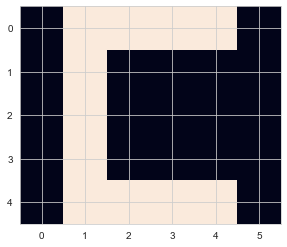

In [22]:
predict(x[2],w1,w2)

image is of letter A
image is of letter B
image is of letter C


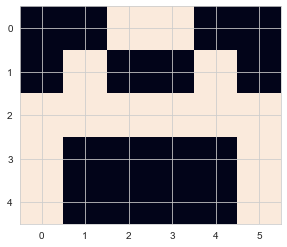

In [20]:
predict(x[0],w1,w2)